# Step 1: Opened the data file and studied the general information:


Goal Of the Project:
We are analysing the plans for the Megaline company customers. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
we are going to carry out a preliminary analysis of the plans based on a relatively small client selection. we'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. our job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.


In [1]:
import pandas as pd
import numpy as np
megacalls = pd.read_csv('/datasets/megaline_calls.csv')
megacalls.info()
megacalls.describe()
megacalls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Created megacalls variable to save Dataframe which contains data on calls for megaline users. Studied the different areas of the DataFrame

In [2]:
#megacalls.isnull().sum()
megacalls['DateTime'] = megacalls['call_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
megacalls['month'] = pd.DatetimeIndex(megacalls['DateTime']).month
megacalls_grouped = megacalls.groupby(['user_id','month'])['duration'].sum().to_frame(name = 'duration').reset_index()
megacalls_grouped

,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


Here I have calculated the total duration for megaline users as they spent on calls. The duration is in the minutes. so, we calculated how much duration user used for calls per month.

Zero Duration Calls: 
Zero Duration calls are basically calls which are Missed or Had conversation for less than 60 seconds

In [3]:
megainternet = pd.read_csv('/datasets/megaline_internet.csv')
megainternet.info()
megainternet.describe()
megainternet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


Created megainternet variable to save Dataframe which contains data on internet usage for megaline users. Studied the different areas of the DataFrame

In [4]:
megainternet.isnull().sum()
megainternet['DateTime'] = megainternet['session_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
megainternet['month'] = pd.DatetimeIndex(megainternet['DateTime']).month
megainternet_grouped = megainternet.groupby(['user_id','month'])['mb_used'].sum().to_frame(name = 'mb_used').reset_index()

megainternet_grouped

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Here I have calculated the total internet use for megaline users as they spent on internet. The web usage is in the Megabytes. so, we calculated how much internet user used for web usage per month.

In [5]:
megamsg = pd.read_csv('/datasets/megaline_messages.csv')
megamsg.info()
megamsg.describe()
megamsg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


Created megamsg variable to save Dataframe which contains data on Message usage for megaline users. Studied the different areas of the DataFrame

In [6]:
megamsg.isnull().sum()
megamsg['DateTime'] = megamsg['message_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
megamsg['month'] = pd.DatetimeIndex(megamsg['DateTime']).month
megamsg_grouped = megamsg.groupby(['user_id','month'])['message_date'].count().to_frame(name = 'message_date').reset_index()
megamsg_grouped

,user_id,month,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


Here I have calculated the total texts use for megaline users as they spent on Messages. so, we calculated how much messages user per month.

In [7]:
megaplan = pd.read_csv('/datasets/megaline_plans.csv')
megaplan.info()
megaplan.describe()
megaplan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Created megaplan variable to save Dataframe which contains data on plan usage for megaline users. Studied the different areas of the DataFrame and information about the plans Surf and Ultimate.

In [8]:
megauser = pd.read_csv('/datasets/megaline_users.csv')
megauser.info()
megauser.describe()
megauser

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


Created megauser variable to save Dataframe which contains data on megaline users. Studied the different areas of the DataFrame and information about the user details.

In [9]:
megauser.isnull().sum()
megauser['churn_date'].isnull().sum()

466

churn_date is the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)

# Step 2: Data preparation

In [10]:
from functools import reduce
data_frames = [megamsg_grouped, megainternet_grouped, megacalls_grouped]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)
print(len(df_merged))
df_merged.head(5)
print(df_merged.isnull().sum())

2293
user_id           0
month             0
message_date    487
mb_used          16
duration         35
dtype: int64


We have merged all three Dataframes into single Dataframe to calculate revenue and we found out some missing values because of churn date and because users did not fully used their plan as some users might used just calls, internet, messages and combinations.

In [11]:
df_merged['message_date'] = df_merged.groupby('month')['message_date'].fillna(value = df_merged['message_date'].mean())
df_merged['mb_used'] = df_merged.groupby('month')['mb_used'].fillna(value = df_merged['mb_used'].mean())
df_merged['duration'] = df_merged.groupby('month')['duration'].fillna(value = df_merged['duration'].mean())
print(df_merged.isnull().sum())


user_id         0
month           0
message_date    0
mb_used         0
duration        0
dtype: int64


We filled up missing values with mean according to monthly usage so it will not affect on our further calculations.

Why Used Mean?
The mean (or average) is the most popular and well known measure of central tendency. It can be used with both discrete and continuous data.

The median is the middle score for a set of data that has been arranged in order of magnitude.

The mode is the most frequent score in our data set. 

So, We can't predict the usage of user as I mentioned it above some users did not used full benifits of plan such as some users made calls but did not send SMS so, we can not use median or mode and put the value for it. However, If we use Mean it will not gonna affect on our calculation and not going to give us false results.

In [12]:
df_merged_new=df_merged.merge(megauser[['user_id','plan','city']],how='left',on='user_id')
print(len(df_merged_new))
df_merged_new.head(5)
print(df_merged_new.isnull().sum())

2293
user_id         0
month           0
message_date    0
mb_used         0
duration        0
plan            0
city            0
dtype: int64


We Merged the first table with User information table as we need to calculate revenue and different theories of hypothesis acoording to user information.

In [13]:
def total_cost(row):
 
    plan = row['plan']    
    
    internet = row['mb_used']
    calls = row['duration']
    msg = row['message_date']
    
    
    
    surfmc = 20
    ultimatemc = 70
    
    s_cpmin = 0.03
    s_cpmsg = 0.03
    s_cpgb = 10
    s_cpmb = 10 / 1024
    
    u_cpmin = 0.01
    u_cpmsg = 0.01
    u_cpgb = 7
    u_cpmb = 7 / 1024
    
 
    if plan == 'surf':
       
            if msg <= 50:
                surf_txt = 0
            else:
                surf_txt =(msg-50)*(s_cpmsg)
                
            if internet <= 15360:
                surf_gb = 0
            else:
                surf_gb = (internet - 15360) * (s_cpmb)
                
            if calls <= 500:
                surf_calls = 0
            else:
                surf_calls = (calls - 500)*(s_cpmin)
                
            cost = 20 + surf_txt + surf_gb + surf_calls
        
    elif plan == 'ultimate':
      
        if msg <= 1000:
            ulti_txt = 0
        else:
            ulti_txt = (msg-1000)* (u_cpmsg)
            
        if internet <= 30720:
            ulti_gb = 0
        else:
            ulti_gb = (internet - 30720) * (u_cpmb)
            
        if calls <= 3000:
            ulti_calls = 0
        else:
            ulti_calls = (calls - 3000)*(u_cpmin)
            
        cost = 70 + ulti_txt + ulti_gb + ulti_calls
            
    return cost
 
df_merged_new['total_cost'] = df_merged_new.apply(total_cost, axis = 1)
df_merged_new.head(10)
#print(df_merged_new.isnull().sum())

,user_id,month,message_date,mb_used,duration,plan,city,total_cost
0,1000,12,11.0,1901.47,116.83,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.000000
1,1001,8,30.0,6919.15,171.14,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.000000
2,1001,9,44.0,13314.82,297.69,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.000000
3,1001,10,53.0,22330.49,374.11,surf,"Seattle-Tacoma-Bellevue, WA MSA",88.161191
4,1001,11,36.0,18504.30,404.59,surf,"Seattle-Tacoma-Bellevue, WA MSA",50.706055
5,1001,12,44.0,19369.18,392.93,surf,"Seattle-Tacoma-Bellevue, WA MSA",59.152148
6,1002,10,15.0,6552.01,54.13,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.000000
7,1002,11,32.0,19345.08,359.76,surf,"Las Vegas-Henderson-Paradise, NV MSA",58.916797
8,1002,12,41.0,14396.24,363.24,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.000000
9,1003,12,50.0,27044.14,1041.00,surf,"Tulsa, OK MSA",150.332930


Here we calculated total revenue on user who used plan according to its monthly value.

In [14]:
df_merged_surf = df_merged_new.query('plan == "surf"')
print(df_merged_surf.isnull().sum())
df_merged_ulti = df_merged_new.query('plan == "ultimate"')
df_merged_ulti.isnull().sum()

user_id         0
month           0
message_date    0
mb_used         0
duration        0
plan            0
city            0
total_cost      0
dtype: int64


user_id         0
month           0
message_date    0
mb_used         0
duration        0
plan            0
city            0
total_cost      0
dtype: int64

Here we separated the dataframe according to plan used by users Surf and Ultimate to calculate and analyse customers' behavior and volume of usage according to plan.

# Step 3: Analyze the data:

In [15]:
import pylab as pl
import matplotlib.pyplot as plt


In [16]:
columns_to_be_cleaned = ['mb_used','duration', 'message_date',]
#Used for loop to plot graphs for given inforamation with and without outliers

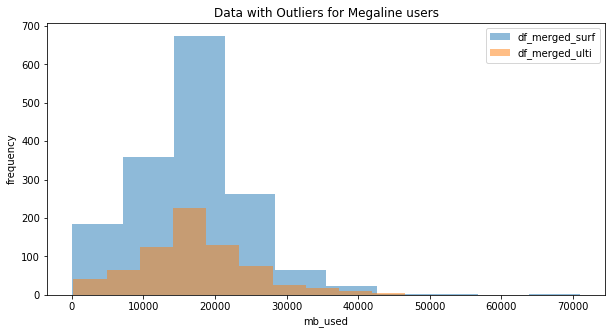

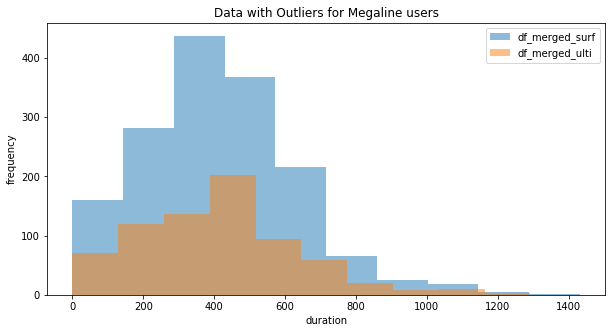

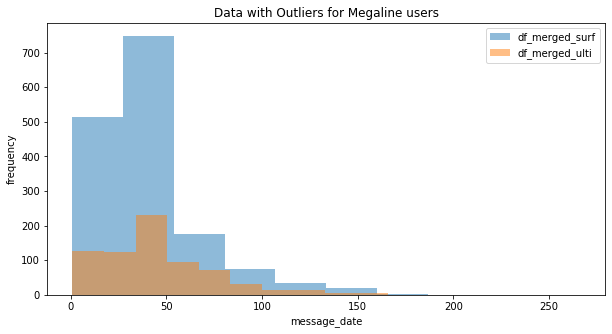

In [17]:
for i in columns_to_be_cleaned:
    plt.figure(figsize=(10,5))
    plt.hist(df_merged_surf[f'{i}'], alpha = 0.5, label='df_merged_surf')
    plt.hist(df_merged_ulti[f'{i}'], alpha = 0.5, label='df_merged_ulti')
    plt.title('Data with Outliers for Megaline users')
    plt.xlabel(f'{i}')
    plt.ylabel('frequency')
    plt.legend(loc='upper right')
    plt.show()


12222.240000000003
20999.610000000004
8777.37
12671.449999999999
21014.527499999997
8343.077499999998


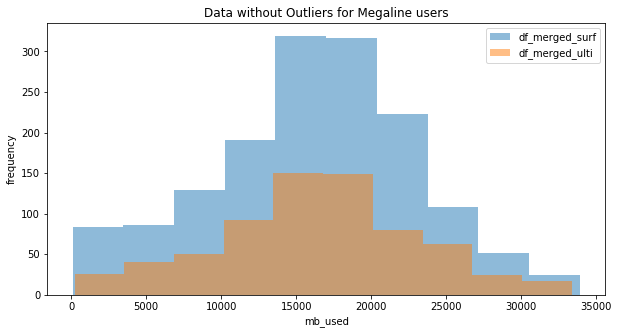

267.53999999999996
543.6800000000001
276.1400000000001
249.08749999999998
532.2275000000001
283.1400000000001


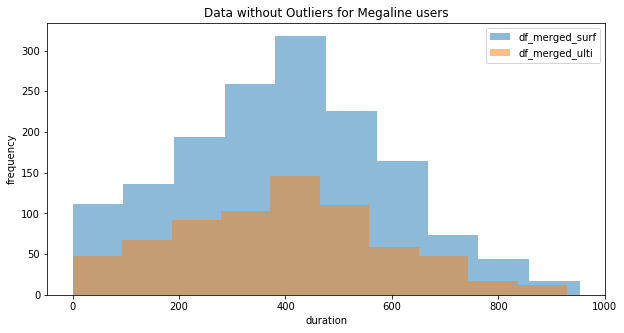

21.0
47.0
26.0
25.0
61.0
36.0


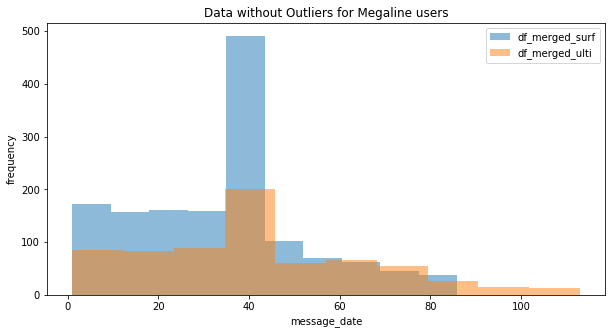

In [18]:
for x in columns_to_be_cleaned:
    Q1 = df_merged_surf[x].quantile(0.25)
    print(Q1)
    Q3 = df_merged_surf[x].quantile(0.75)
    print(Q3)
    IQR = Q3 - Q1
    print(IQR)
    Q1_ulti = df_merged_ulti[x].quantile(0.25)
    print(Q1_ulti)
    Q3_ulti = df_merged_ulti[x].quantile(0.75)
    print(Q3_ulti)
    IQR_ulti = Q3_ulti - Q1_ulti
    print(IQR_ulti)
    new_df_surf = df_merged_surf.query(f"{x} >= @Q1 - 1.5*@IQR and {x} <= @Q3+1.5*@IQR")
    new_df_ulti = df_merged_ulti.query(f"{x} >= @Q1_ulti - 1.5*@IQR_ulti and {x} <= @Q3_ulti+1.5*@IQR_ulti")
    plt.figure(figsize=(10,5))
    plt.hist(new_df_surf[f'{x}'], alpha = 0.5, label='df_merged_surf')
    plt.hist(new_df_ulti[f'{x}'], alpha = 0.5, label='df_merged_ulti')
    plt.title('Data without Outliers for Megaline users')
    plt.xlabel(f'{x}')
    plt.ylabel('frequency')
    plt.legend(loc='upper right')
    plt.show()


data distribution with more values to the right of the mean than to the left (as in the distribution pictured above) is said to skew to the right. This is positive skew.
Surf plan data is skewed more than Ultimate plan data this differentiated our outcome of requirements of user according to plan.

Type of Distribution:
A binomial distribution graph where the probability of success does not equal the probability of failure looks like

data distribution with more values to the right of the mean than to the left (as in the distribution pictured above) is said to skew to the right. This is positive skew.
Surf plan data is skewed less than Ultimate plan data this differentiated our outcome of requirements of user according to plan.
data distribution with more values to the right of the mean than to the left (as in the distribution pictured above) is said to skew to the right. This is positive skew.
Surf plan data is skewed less than Ultimate plan data this differentiated our outcome of requirements of user according to plan.

In [19]:
ulti_msg_mean = df_merged_ulti['message_date'].mean()
print('Mean of Messages used in Ultimate Plan:', ulti_msg_mean)
variance = np.var(df_merged_ulti['message_date'])
print('Variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of Messages used in Ultimate Plan: 45.50553556047742
Variance: 881.3815693753392
standard_deviation: 29.688071162932413


In [20]:
surf_msg_mean = df_merged_surf['message_date'].mean()
print('Mean of Messages used in Surf Plan:', surf_msg_mean)
variance = np.var(df_merged_surf['message_date'])
print('Variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of Messages used in Surf Plan: 40.55605599474521
Variance: 847.8211043174331
standard_deviation: 29.11736774362396


Here we can see the Mean of messages used by megaline user is around 41 for surf plan and 46 for ultimate plan messages and we got standard deviation of around 30 Messages for Surf and Ultimate plan respectively. So, as standard deviation is lower than expected value(Mean) we can say that most of the numbers are close to the average.

In [21]:
ulti_call_mean = df_merged_ulti['duration'].mean()
print('Mean of Calls used in Ulti Plan:',ulti_call_mean)
variance = np.var(df_merged_ulti['duration'])
print('variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of Calls used in Ulti Plan: 410.1937057007184
variance: 49949.4190271269
standard_deviation: 223.4936666376184


In [22]:
surf_call_mean = df_merged_surf['duration'].mean()
print('Mean of Calls used in Surf Plan:' , surf_call_mean)
variance = np.var(df_merged_surf['duration'])
print('variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of Calls used in Surf Plan: 412.0871153325296
variance: 46134.74037425061
standard_deviation: 214.78999132699505


In [23]:
surf_internet_mean = df_merged_surf['mb_used'].mean()
print('Mean of Internet used in Surf Plan:',surf_internet_mean)
variance = np.var(df_merged_surf['mb_used'])
print('variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of Internet used in Surf Plan: 16719.270751758722
variance: 61536128.09815068
standard_deviation: 7844.496675896465


In [24]:
ulti_internet_mean = df_merged_ulti['mb_used'].mean()
print('Mean of Internet used in Surf Plan:',ulti_internet_mean)
variance = np.var(df_merged_ulti['mb_used'])
print('variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of Internet used in Surf Plan: 17238.14719097375
variance: 61154677.39822985
standard_deviation: 7820.145612341873


Calculated The Mean, Variance and Standard Deviation for all three major aspect of plan Surf and Ulti Respectively.

# Step 4: Test the hypotheses:

In [25]:
from scipy import stats as st

In [26]:
surf_total_mean = df_merged_surf['total_cost'].mean()
print('Mean of total_cost in Surf Plan:',surf_total_mean)
variance = np.var(df_merged_surf['total_cost'])
print('variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of total_cost in Surf Plan: 57.4355375002264
variance: 2877.7410523593503
standard_deviation: 53.64458082937502


In [27]:
ulti_total_mean = df_merged_ulti['total_cost'].mean()
print('Mean of total_cost in Surf Plan:',ulti_total_mean)
variance_ulti = np.var(df_merged_ulti['total_cost'])
print('variance:',variance_ulti)
standard_deviation = np.sqrt(variance_ulti)
print('standard_deviation:',standard_deviation)

Mean of total_cost in Surf Plan: 72.11607964409723
variance: 115.8070138035419
standard_deviation: 10.761366725632108


surf data Mean = 57.4355375002264

Ulti Data Mean = 72.11607964409723


According to the problem above, there can be two possible conditions:

The after-experiment results are similar and the revenue for both plan will be same. This will be our “Null Hypothesis”
The after-experiment results are indeed very different and revenue of both plans will be different. This will be our “Alternate Hypothesis”

In [28]:
from scipy.stats import mannwhitneyu

In [29]:
df_merged_surf['total_cost'].apply(pd.to_numeric)
df_merged_ulti['total_cost'].apply(pd.to_numeric)

stat, p = mannwhitneyu(df_merged_ulti['total_cost'], df_merged_surf['total_cost'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if (p > alpha):
    print("Same distribution (fail to reject H0)")
else:
    print("Different distribution (reject H0)")

Statistics=318056.000, p=0.000
Different distribution (reject H0)


We reject the null Hypothesis that means this probability clearly indicates that we have difference in data according user plan their requirements also, are different.

In [30]:
df_merged_new['total_cost'].apply(pd.to_numeric)
revenue_nynj = (df_merged_new.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"'))
revenue_other = (df_merged_new.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"'))



We reject the null Hypothesis that means this probability clearly indicates that we have difference in data according user location their requirements also, are different.

In [31]:
nynj_mean = revenue_nynj['total_cost'].mean()
print('Mean of total_cost in NyNj area Plan:',nynj_mean)
variance = np.var(revenue_nynj['total_cost'])
print('variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of total_cost in NyNj area Plan: 57.19048435842175
variance: 1773.0373983011452
standard_deviation: 42.10745062695135


In [32]:
mean_other = revenue_other['total_cost'].mean()
print('Mean of total_cost in other area Plan:',mean_other)
variance = np.var(revenue_other['total_cost'])
print('variance:',variance)
standard_deviation = np.sqrt(variance)
print('standard_deviation:',standard_deviation)

Mean of total_cost in other area Plan: 63.00045158062691
variance: 2107.2275431758103
standard_deviation: 45.90454817527137


NyNj data Mean = 57.19048435842175

Other Data Mean = 63.00045158062691


According to the problem above, there can be two possible conditions:

The after-experiment results are similar and the revenue for NyNj area and Other area will be same. This will be our “Null Hypothesis”
The after-experiment results are indeed very different and revenue for NyNj area and Other area will be different. This will be our “Alternate Hypothesis”

In [33]:
stat, p = mannwhitneyu(revenue_nynj['total_cost'], revenue_other['total_cost'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if (p > alpha):
    print("Same distribution (fail to reject H0)")
else:
    print("Different distribution (reject H0)")

Statistics=324245.000, p=0.001
Different distribution (reject H0)


# Step 5: Final Conclusion:

As you can see in the visual histogram above, the distribution changes when we subset the data by Plan. For the population using Surf plan, the distribution peaks around middle parameter with skew involved. For the population using Ultimate Plan, the peak occurs with slight change. This intuitively makes sense, as people have different requirements according to their use and monthly budget.

Here We are using the Mann-Whitney U Test is a null hypothesis test, used to detect differences between two independent data sets. The test is specifically for non-parametric distributions, which do not assume a specific distribution for a set of data. Because of this, the Mann-Whitney U Test can be applied to any distribution, whether it is Gaussian or not.

The first output, the u-statistic, is defined U Test states that the distributions of two data sets are identical. If the null hypothesis is correct for the Mann-Whitney U Test. The U-statistic is interpreted using a two-tailed test table in our case for Ultimate and Surf Plan costs and NYNJ area and other areas, where the table contains critical values of U. To reject the null hypothesis at α=0.05, the U obtained from the test must be below the critical value of U found in the test table.

U tends to be large when both sample sizes are large. This explains why the u-statistic for this example — 324245.000 — is such a massive number.

Alpha is refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.
Generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample.

We are using one-tailed test for this hypothesis where the region of rejection is on only one side of the sampling distribution.

The second Python output is the p-value associated with the test. The lower the p-value, the stronger the evidence against the null hypothesis. As a general rule of thumb, when the p-value is below 0.05, the null hypothesis can be rejected. The p-value for this specific example is so low that it registers as 0, so we can definitely reject the null hypothesis. This outcome verifies, with statistical significance, that the Cost amount and requirement  distribution for megaline Users using Surf plan is different than users using Ultimate plan, similar for the users requirements in NYNJ area is diferent from Users in other areas.

According our calculations above and what we got from Mean, variance and Standard Deviation we can say that the Ultimate prepaid plan will be much effective for the user as it's mean for total revenues per month is higher than Surf plan. and our Hypothesis test suggest the probability of customer behaviour are different for the plans.

Most profitable plan is Ultimate Plan.